## **Employee Retention Prediction Model**

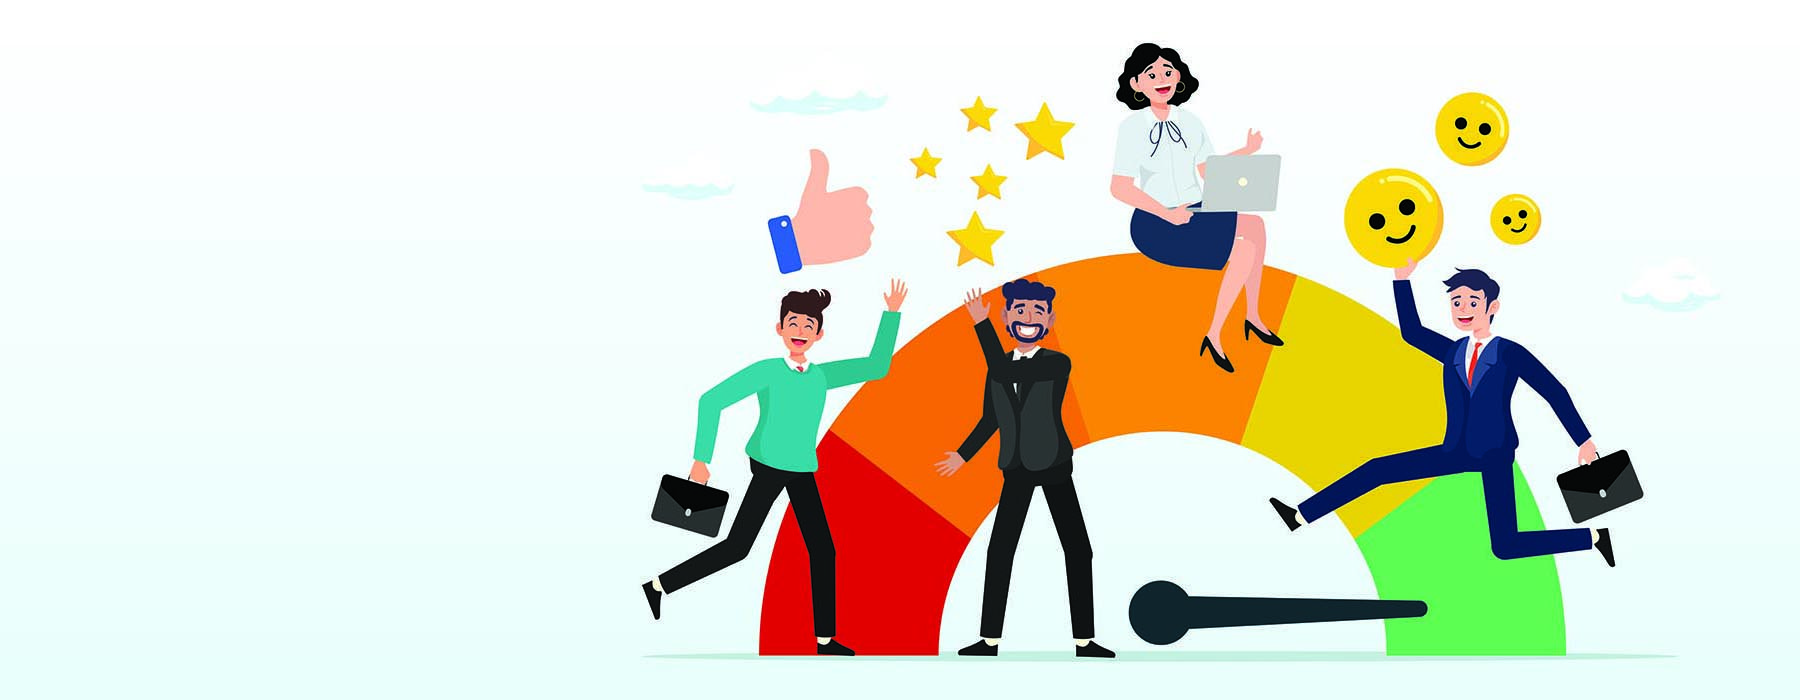

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV ,cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px

In [ ]:
# Load the dataset
df = pd.read_csv('/content/HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
# Renaming columns for clarity
df = df.rename(columns={'sales': 'role', 'average_montly_hours': 'average_monthly_hours'})

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Checking for missing values
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_monthly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
role,0
salary,0


In [ ]:
# Descriptive statistics and initial overview
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   role                   11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(11991, 10)

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'role', 'salary'],
      dtype='object')

In [ ]:
for i in df.columns:
  print(i,df[i].unique())
  print('--'*100)

satisfaction_level [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
last_evaluation [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0

In [ ]:
for i in df.columns:
  print(i,df[i].value_counts())
  print('--'*100)

satisfaction_level satisfaction_level
0.74    214
0.10    203
0.73    201
0.50    200
0.72    199
       ... 
0.25     29
0.26     28
0.12     26
0.28     24
0.27     23
Name: count, Length: 92, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
last_evaluation last_evaluation
0.55    281
0.50    269
0.51    264
0.57    258
0.54    252
       ... 
0.42     45
0.43     44
0.38     42
0.44     35
0.36     19
Name: count, Length: 65, dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
number_project number_project
4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: count, dtype: int64
------------------------------------------------------------------------

In [ ]:
# Visualizations: Employee Turnover Insights
df['left'] = df['left'].map({1: 'Left', 0: 'Stayed'})
fig = px.histogram(df, x='satisfaction_level', color='left',color_discrete_map={'Left': 'red', 'Stayed': 'blue'} ,title='Satisfaction Level and Turnover', nbins=10, width=900, height=500)
fig.update_layout(xaxis_title='Satisfaction Level',yaxis_title='Count',legend=dict(title='Employee Status'),template='plotly_white')
fig.show()

Employees who are very satisfied usually stay

Employees who are not satisfied usually leave

In [ ]:
fig=px.histogram(df,x='last_evaluation',color='left',color_discrete_map={'Left':'red','Stayed':'blue'},nbins=10,title='Last Evaluation and Turnover',width=900,height=500)
fig.update_layout(xaxis_title='Last Evaluation',yaxis_title='Count',legend=dict(title='Employee Status'),template='plotly_white')
fig.show()


There's a higher turnover among both average performers (0.5) and high performers (0.8-0.9)

In [ ]:
fig=px.histogram(df,x='number_project',color='left',color_discrete_map={'Left':'red','Stayed':'blue'},title='Number of Projects and Turnover',width=900,height=500)
fig.update_layout(xaxis_title='Number of Projects',yaxis_title='Count',legend=dict(title='Employee Status'),template='plotly_white')
fig.show()


Having too few projects (2 or less) makes people leave

Having too many projects (7 or more) also makes people leave

The best number of projects is 3-5

This shows we need to give people enough work, but not too much

In [ ]:
fig=px.histogram(df,x='average_monthly_hours',color='left',color_discrete_map={'Left':'red','Stayed':'blue'},nbins=10,title='Average Monthly Hours and Turnover',width=900,height=500)
fig.update_layout(xaxis_title='Average Monthly Hours',yaxis_title='Count',legend=dict(title='Employee Status'),template='plotly_white')
fig.show()


People who work very few hours (less than 150 per month) often leave

People who work too many hours (more than 250 per month) also leave

The ideal working hours are between 160-220 per month

This means we should avoid overworking or underworking people

In [ ]:
fig=px.histogram(df,x='time_spend_company',color='left',color_discrete_map={'Left':'red','Stayed':'blue'},title='Time Spent in the Company and Turnover',width=900,height=500)
fig.update_layout(xaxis_title='Years Spent in Company',yaxis_title='Count',legend=dict(title='Employee Status'),template='plotly_white')
fig.show()


Most people decide to leave between their 3rd and 5th year

This is a critical time when people want career growth

If people stay past 6 years, they usually continue staying

We should focus on supporting employees during their 3rd to 5th years

In [ ]:
fig=px.histogram(df,x='promotion_last_5years',color='left',color_discrete_map={'Left':'red','Stayed':'blue'},title='Promotion in Last 5 Years and Turnover',width=900,height=500)
fig.update_layout(xaxis_title='Promotion in Last 5 Years (0=No, 1=Yes)',yaxis_title='Count',legend=dict(title='Employee Status'),template='plotly_white')
fig.show()


Almost no one leaves after getting a promotion

This tells us that promotions are very important for keeping employees

In [ ]:
fig=px.histogram(df,x='role',color='left',color_discrete_map={'Left':'red','Stayed':'blue'},title='Role and Turnover',width=900,height=500)
fig.update_layout(xaxis_title='Role',yaxis_title='Count',legend=dict(title='Employee Status'),template='plotly_white')
fig.show()


The sales role within the organization has the highest employee turnover, with a significant portion of the sales team having left the company. Additionally, the IT, product management, and marketing teams also experience notable turnover compared to other roles.

In [ ]:
fig=px.histogram(df,x='salary',color='left',color_discrete_map={'Left':'red','Stayed':'blue'},title='Salary and Turnover',width=900,height=500)
fig.update_layout(xaxis_title='Salary Level (low, medium, high)',yaxis_title='Count',legend=dict(title='Employee Status'),template='plotly_white')
fig.show()


Higher salary means people are more likely to stay

Most people who leave have low or medium salaries

This suggests we should review our salary structure

In [ ]:
df['left'] = df['left'].map({'Left': 1, 'Stayed': 0})
numerical_df=df.select_dtypes(include=['int64','float64'])
corr_matrix=numerical_df.corr()
fig=px.imshow(corr_matrix,text_auto=True,title='Correlation Heatmap',color_continuous_scale='RdBu',width=900,height=500)
fig.update_layout(xaxis_title='Features',yaxis_title='Features',template='plotly_white')
fig.show()


For numerical variables, looks like satisfaction_level has a strong negative correlation to employee churning which supports our idea that the higher the satisfaction level, the less chance of an employee leaving. The same also applies to salary. For features like last_evaluation, number_project, average_monthly_hours... correlation values are low because their relationship with employee churn isn't exactly linear

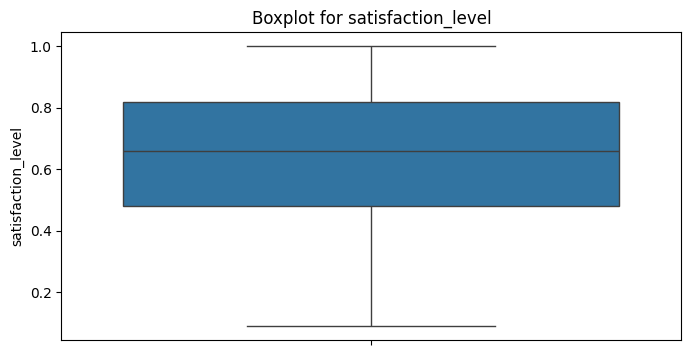

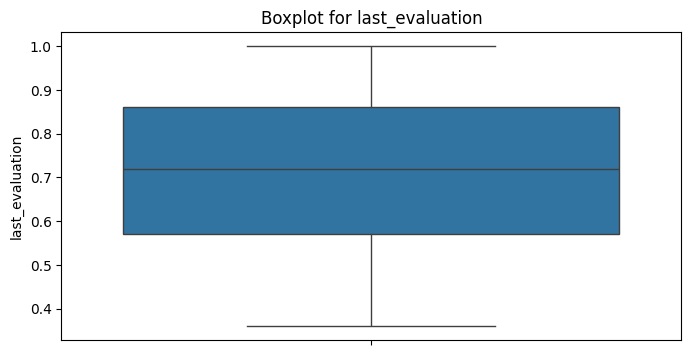

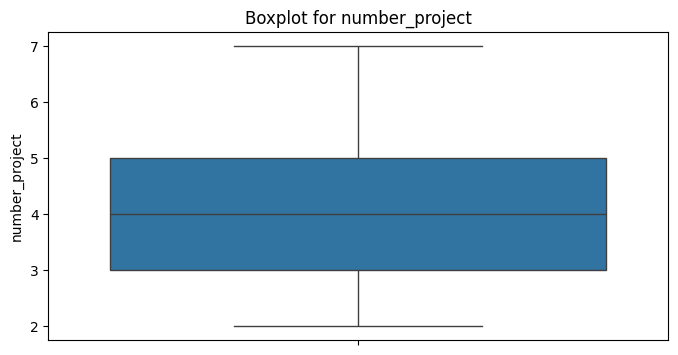

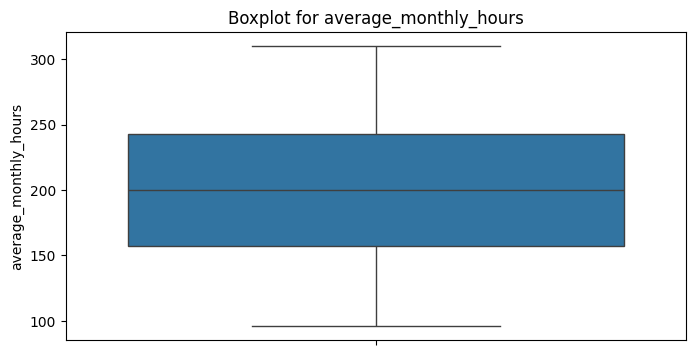

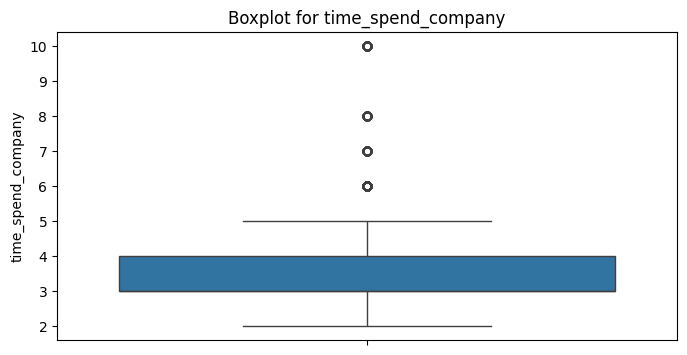

In [ ]:
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
                      'average_monthly_hours', 'time_spend_company']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

Outliers in time_spend_company were retained as they likely represent meaningful employee behaviors, such as extreme loyalty or early dissatisfaction, which are crucial for understanding retention patterns

In [ ]:
# Encoding categorical variables
le=LabelEncoder()
df['salary']=le.fit_transform(df['salary'])

In [ ]:
print(dict(enumerate(le.classes_)))

{0: 'high', 1: 'low', 2: 'medium'}


In [ ]:
# Perform one-hot encoding on the 'role' column
df_categorical_encoded = pd.get_dummies(df[['role']])

# Drop the original 'role' column
df_drop = df.drop(['role'], axis=1)

# Add the one-hot encoded columns back to the DataFrame
df = df_drop.join(df_categorical_encoded)

In [ ]:
# Splitting features and target variable
x=df.drop('left',axis=1)
y=df['left']

In [ ]:
# Train-Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Handling imbalance using SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [ ]:
# Scaling numerical features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Train and evaluate models
knn=KNeighborsClassifier()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svm=SVC()

models=[knn,lr,dt,rf,svm]


results = {}


for model in models:
    model_name = type(model).__name__
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    train_accuracy = model.score(x_train, y_train)
    test_accuracy = accuracy
    results[model_name] = {
        "Training Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Classification Report": class_report
    }

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Training Accuracy: {metrics['Training Accuracy']:.4f}")
    print(f"Test Accuracy: {metrics['Test Accuracy']:.4f}")
    print("Classification Report:")
    print(metrics["Classification Report"])
    print("-" * 50)

Model: KNeighborsClassifier
Training Accuracy: 0.9704
Test Accuracy: 0.9408
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1998
           1       0.79      0.87      0.83       401

    accuracy                           0.94      2399
   macro avg       0.88      0.91      0.90      2399
weighted avg       0.94      0.94      0.94      2399

--------------------------------------------------
Model: LogisticRegression
Training Accuracy: 0.8343
Test Accuracy: 0.8066
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1998
           1       0.44      0.63      0.52       401

    accuracy                           0.81      2399
   macro avg       0.68      0.74      0.70      2399
weighted avg       0.84      0.81      0.82      2399

--------------------------------------------------
Model: DecisionTreeClassifier
Training Accuracy:

Tuned Random Forest Performance:
Training Accuracy: 0.9672
Test Accuracy: 0.9725
Cross-validation Score: 0.9588
Confusion Matrix:


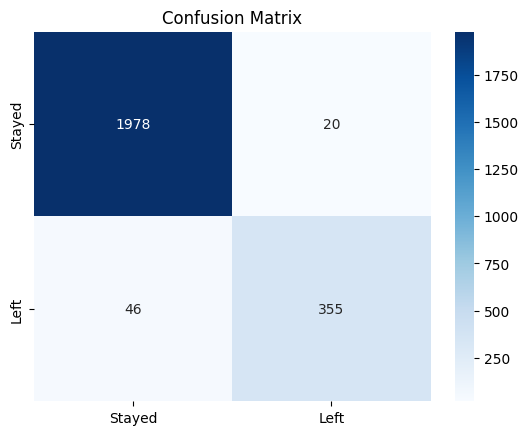

In [ ]:
# Hyperparameter Tuning for Random Forest
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(10, 50, 10),
    'min_samples_split': np.arange(20, 50, 5),
    'min_samples_leaf': np.arange(10, 20, 2)
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, scoring='accuracy', cv=3, random_state=42)
random_search.fit(x_train, y_train)

best_rf = random_search.best_estimator_

train_accuracy = best_rf.score(x_train, y_train)
y_pred_rf = best_rf.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_rf)

cv_score = cross_val_score(best_rf, x_train, y_train, cv=3, scoring='accuracy').mean()

print("Tuned Random Forest Performance:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Cross-validation Score: {cv_score:.4f}")
# Visualizing the Confusion Matrix
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title("Confusion Matrix")
plt.show()


The tuned Random Forest model demonstrates excellent performance with a training accuracy of 96.72% and a test accuracy of 97.25%. The cross-validation score is 95.88%, indicating that the model generalizes well to unseen data. The confusion matrix shows that the model successfully predicts the majority of "Stayed" cases (1978 true positives) with minimal misclassification (20 false positives). It also performs well in identifying the "Left" class with 355 true negatives and only 46 false negatives. Despite the class imbalance, the model manages to maintain a strong balance between both classes. The model is robust and shows no signs of overfitting, making it a reliable solution for predicting employee retention

In [ ]:
# Feature Importance
importances = best_rf.feature_importances_
feature_names = x.columns
sorted_indices = np.argsort(importances)[::-1]
print("Feature Importances:")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")

Feature Importances:
satisfaction_level: 0.2787
time_spend_company: 0.2472
number_project: 0.1496
average_monthly_hours: 0.1444
last_evaluation: 0.1270
Work_accident: 0.0247
salary: 0.0113
role_sales: 0.0051
role_technical: 0.0042
role_support: 0.0026
role_hr: 0.0012
role_accounting: 0.0011
promotion_last_5years: 0.0008
role_IT: 0.0006
role_marketing: 0.0004
role_RandD: 0.0004
role_management: 0.0003
role_product_mng: 0.0002


he feature importance analysis shows that satisfaction level (27.87%) and time spent in the company (24.72%) are the most significant predictors of employee attrition, followed by number of projects (14.96%), average monthly hours (14.44%), and last evaluation (12.70%). Moderately important features include work accidents (2.47%) and salary (1.13%), while job roles and promotion in the last 5 years contribute minimally. This highlights the need to focus on satisfaction, workload, and tenure for improving employee retention strategies

In [ ]:
# Saving the model
import pickle
pickle.dump(best_rf,open('model.sav','wb'))

In [ ]:
# Saving the scaler
import pickle
pickle.dump(scaler,open('scaler.sav','wb'))